In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_csv("districts_data.csv")
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
train_df = train_df.astype({'bathrooms': 'int64'})
train_df = train_df.astype({'bedrooms': 'int64'})
train_df = train_df.astype({'interest_level': 'category'})
train_df = train_df.astype({'num_photos': 'int64'})
train_df = train_df.astype({'num_features': 'int64'})
train_df = train_df.astype({'num_description_words': 'int64'})
train_df = train_df.astype({'created_month': 'category'})
train_df = train_df.astype({'created_day': 'category'})
train_df = train_df.astype({'boro_cd': 'int64'})
train_df = train_df.astype({'price': 'int64'})
train_df = train_df[train_df['boro_cd'] < 150]
train_df.head()

,bathrooms,bedrooms,interest_level,num_photos,num_features,num_description_words,created_month,created_day,boro_cd,price
0,1,2,low,6,6,131,6,1,106,3800
1,1,2,medium,6,6,119,6,14,106,3495
2,1,0,low,4,4,41,6,28,106,2795
3,1,3,low,5,6,132,6,28,106,7200
4,0,1,low,4,1,54,6,9,106,2435


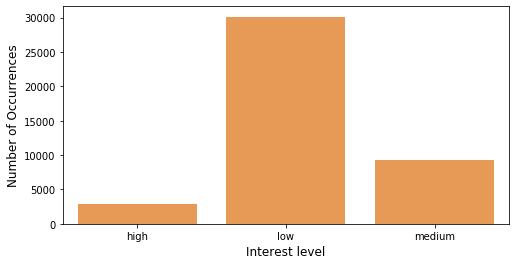

In [3]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

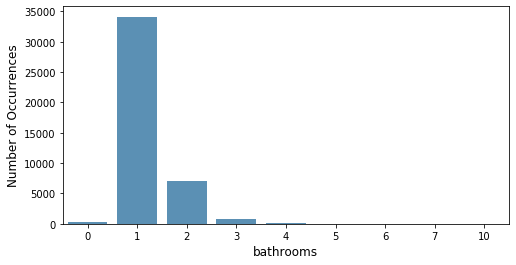

In [4]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

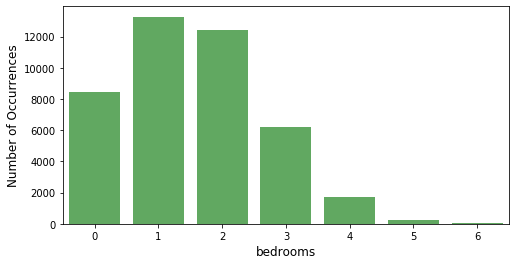

In [5]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

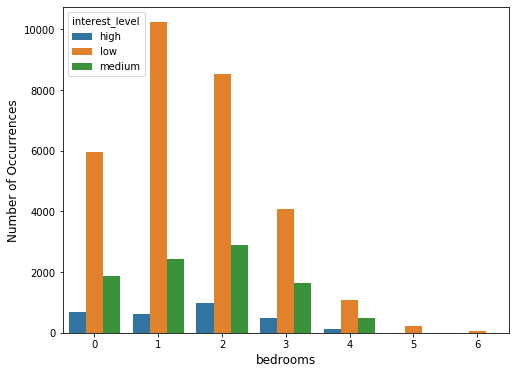

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

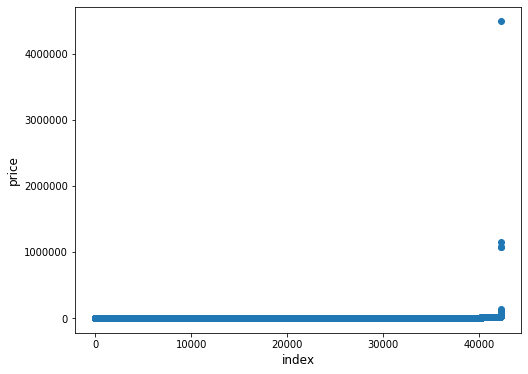

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


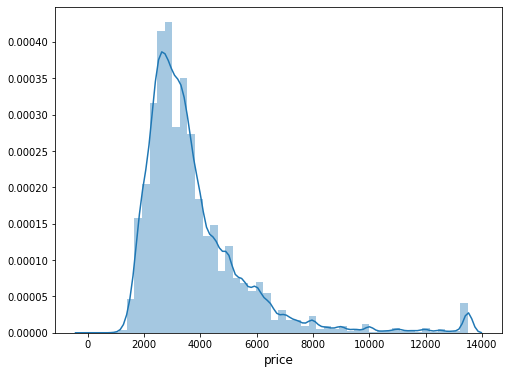

In [8]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [9]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).mean()

In [10]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).std()

In [11]:
grouped = train_df[['price', 'boro_cd']].groupby('boro_cd', group_keys=False).apply(pd.DataFrame.sample, 5, replace = True)
print(grouped.groupby(['boro_cd']).mean())
grouped.groupby(['boro_cd']).std()

# 101 	4091.498433
# 102 	4151.814392
# 103 	3687.778427
# 104 	3666.281911
# 105 	4277.266374
# 106 	3807.612296
# 107 	4230.897276
# 108 	3647.022048
# 109 	2559.476293
# 110 	2617.046452
# 111 	3071.127291
# 112 	2198.330501
# 164 	4878.125000

          price
boro_cd        
101      3982.6
102      3830.0
103      3841.6
104      2833.0
105      4509.0
106      3202.0
107      3722.0
108      2565.0
109      2794.0
110      4789.0
111      2589.0
112      3259.0


,price
boro_cd,
101,1097.159423
102,976.505248
103,1620.710585
104,657.120613
105,2255.943262
106,583.155211
107,3002.177543
108,811.942116
109,758.859341


In [12]:
import scikits.bootstrap as bootstrap 
df = train_df[['price', 'boro_cd']]
X = df.groupby('boro_cd').apply(lambda x:bootstrap.ci(x.values, np.mean))
X = X.values
X = 2*np.array(list(X), dtype=np.float)
X

array([[4136.45625452, 4250.67823572],
       [4189.31933292, 4320.68437307],
       [3744.9880152 , 3837.50891552],
       [3734.63676149, 3807.91210795],
       [4306.76232275, 4460.78933153],
       [3877.56992593, 3950.588     ],
       [4270.14561441, 4410.34291229],
       [3703.89206512, 3808.56095372],
       [2614.95366379, 2726.4299569 ],
       [2651.72      , 2818.10322581],
       [3077.6700611 , 3305.06924644],
       [2273.26847918, 2353.1826678 ]])

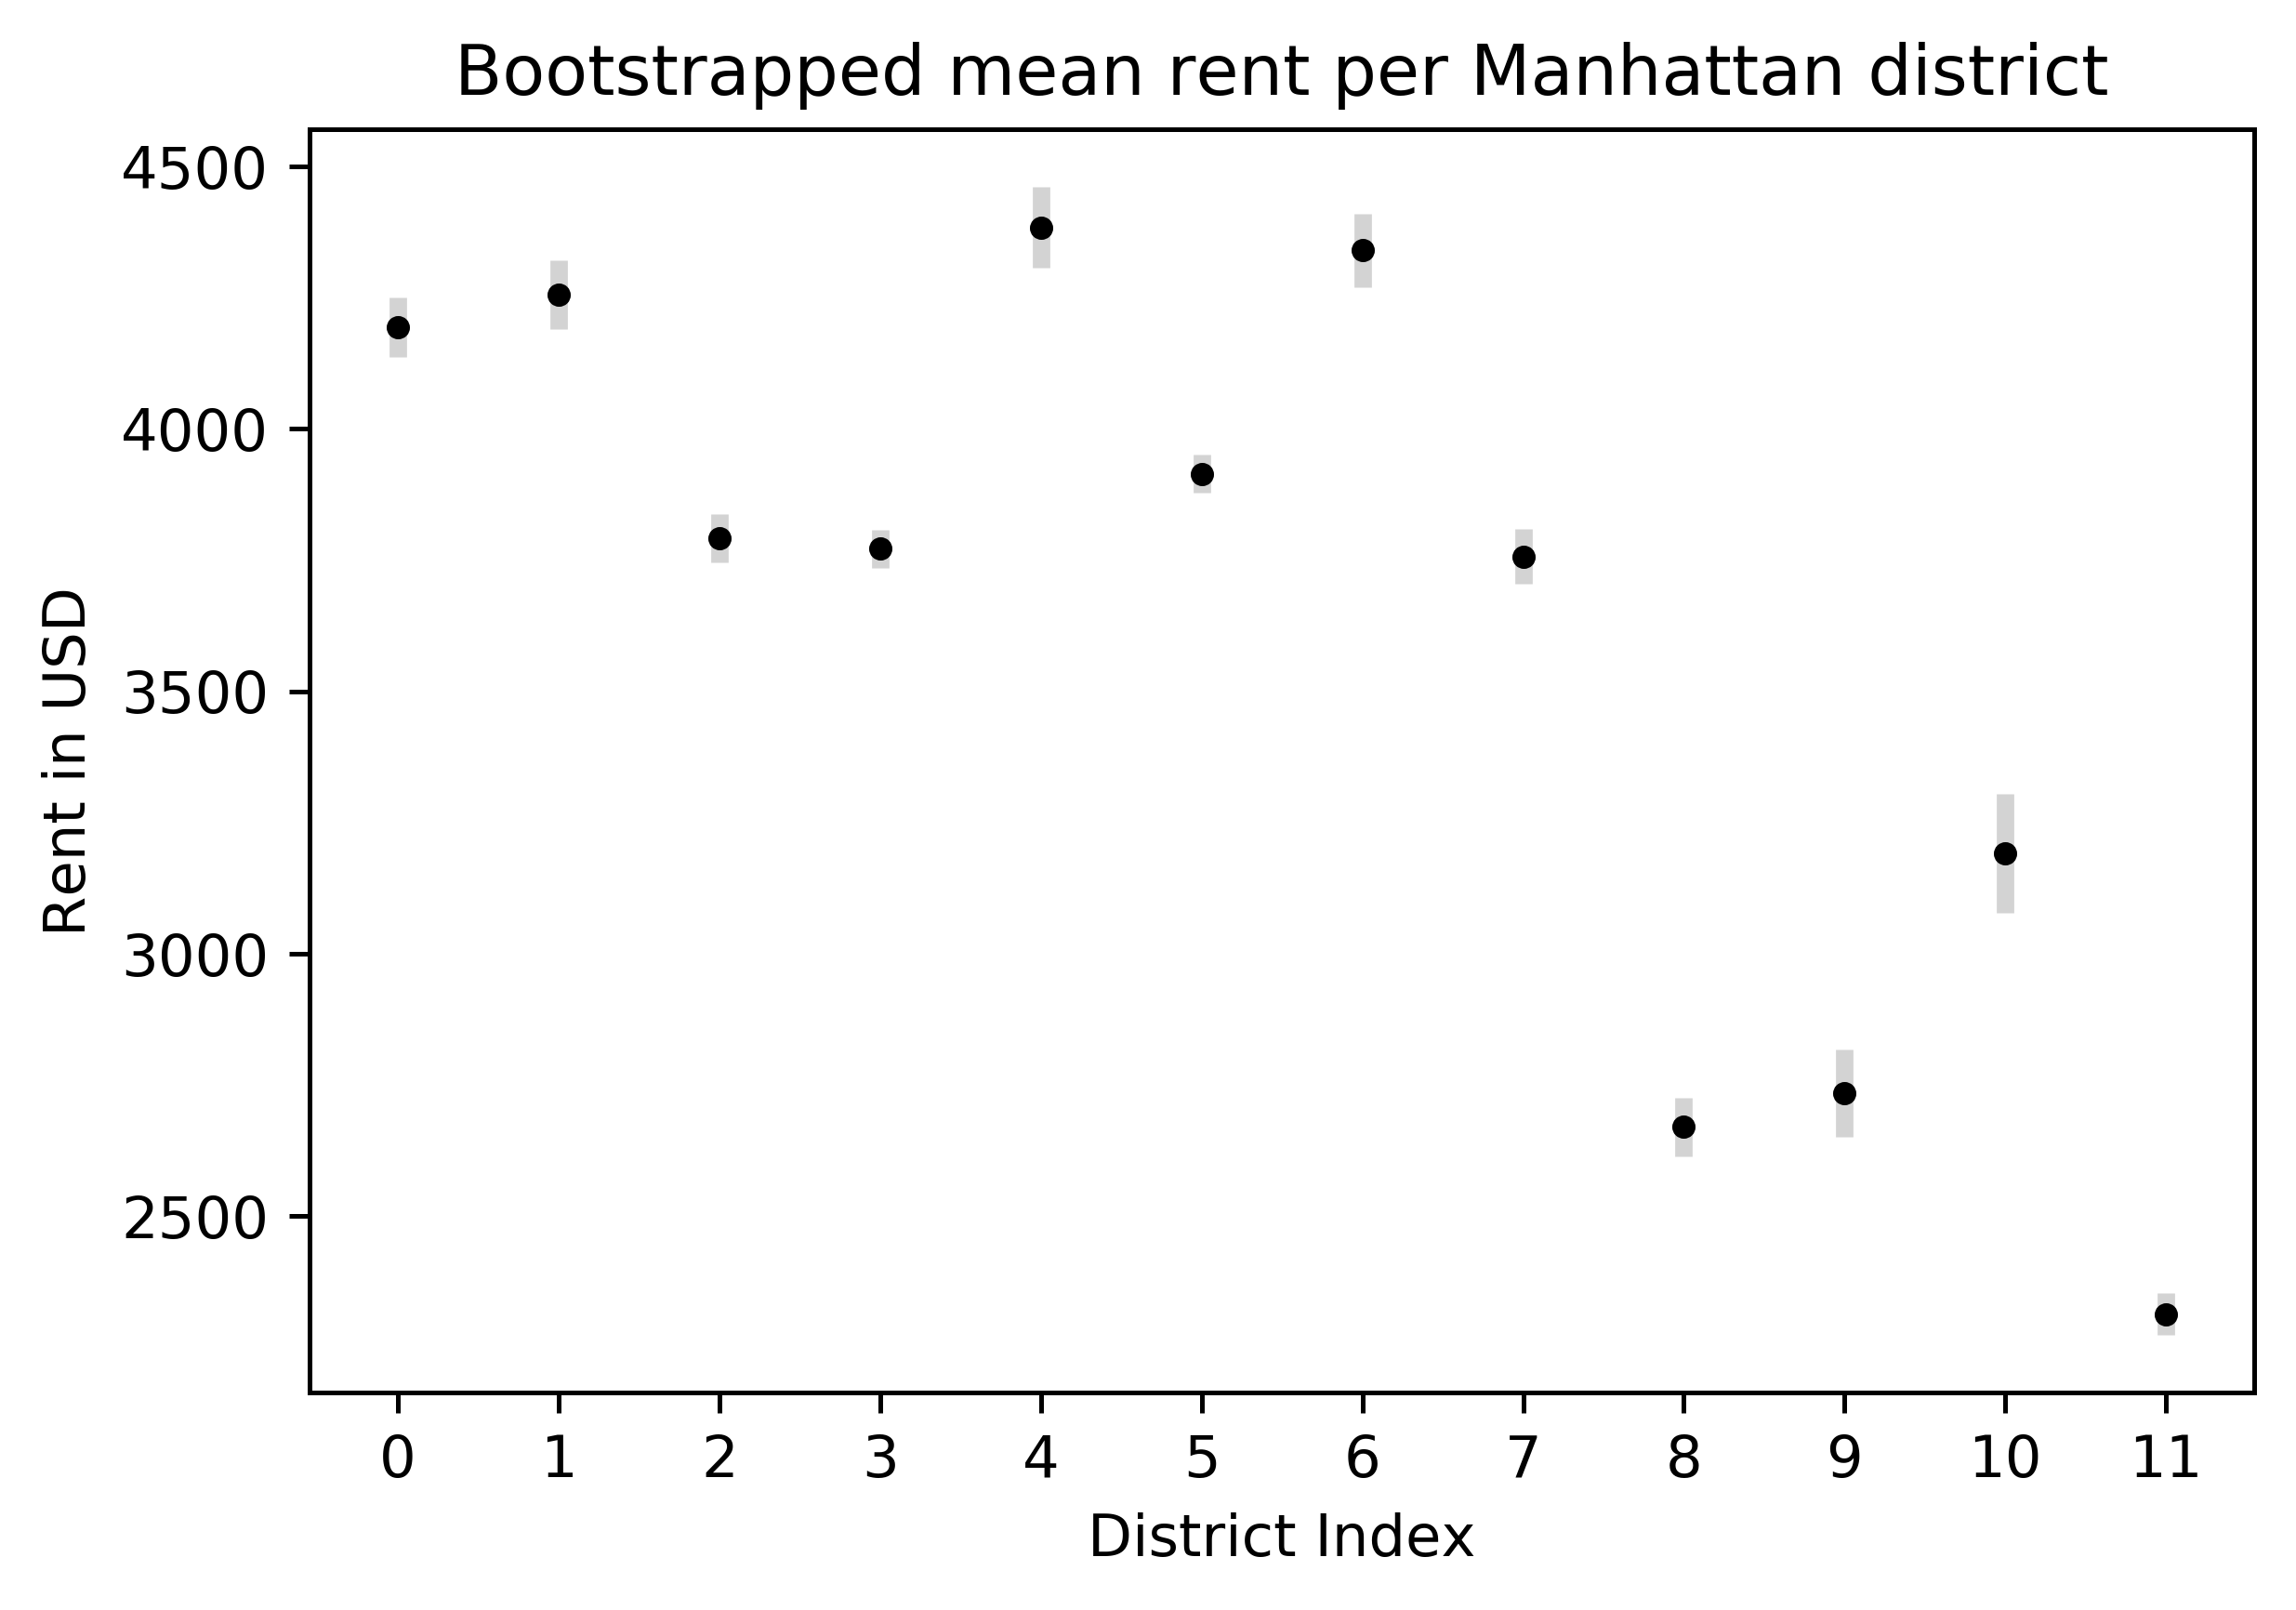

In [13]:
bootstraps = X # All districts

from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

mean = (bootstraps[:,0] + bootstraps[:,1]) / 2
p5 = bootstraps[:,0]
p95 = bootstraps[:,1]

plt.errorbar(
    x = range(bootstraps.shape[0]),
    y = mean,
    yerr=[mean - p5, p95 - mean],
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrapped mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('District Index')
plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [14]:
# plt.savefig('meanNoPark.png', dpi=450)
print(mean)

[4193.56724512 4255.001853   3791.24846536 3771.27443472 4383.77582714
 3914.07896296 4340.24426335 3756.22650942 2670.69181034 2734.9116129
 3191.36965377 2313.22557349]


In [15]:
list(train_df)

['bathrooms',
 'bedrooms',
 'interest_level',
 'num_photos',
 'num_features',
 'num_description_words',
 'created_month',
 'created_day',
 'boro_cd',
 'price']

In [16]:
# Pass 20 properties per node to train set
# Choose 2-3 nodes for training, 2-3 for validation, rest for testing
# Train GCN with labels being the sample average and features of each training instance are bootstrapped from train properties

In [17]:
# df.groupby('b', group_keys=False).apply(pd.DataFrame.sample, frac=.3)
train_samples = train_df.groupby('boro_cd').apply(pd.DataFrame.sample, n=20)

In [18]:
train_samples

bathrooms  bedrooms interest_level  num_photos  num_features  \
boro_cd                                                                       
101     33265          2         2            low           6             3   
        32237          2         2            low           5             3   
        33461          1         3            low           7             7   
        32277          1         3            low           3             3   
        33743          1         1            low           6            13   
        35059          1         1         medium           5            12   
        33261          1         0            low           5             5   
        33303          1         0            low           8            11   
        32191          1         2         medium           5             4   
        31826          1         1            low           4            10   
        34185          2         2            low           0             4   
        33142          1         3         medium           4             7   
        35297          1         2            low           9             8   
        33971          0         1            low           6             4   
        32835          2         3            low           4             9   
        31899          1         3            low           8            10   
        31518          1         1            low          10             0   
        34567          1         0         medium           5             2   
        34091          1         3         medium           9            16   
        32623          2         3            low           5             7   
102     25374          1         1            low           6             5   
        25977          1         0            low           0             1   
        25265          1         1         medium           4             3   
        25262          1         2            low           4             3   
        25308          1         0            low           4             8   
        26125          1         1            low           0             7   
        23808          1         0            low           4             1   
        24363          1         2            low           7             9   
        25769          1         1           high           6             7   
        23647          1         1            low           5             4   
...                  ...       ...            ...         ...           ...   
111     35870          1         1         medium           2             2   
        35858          1         1           high           6             1   
        35734          1         2           high           4             3   
        35715          1         2            low           4            10   
        36071          1         3            low           8             5   
        36361          1         2            low           3             3   
        36416          1         3         medium           5             4   
        35894          1         2         medium           6             2   
        35672          1         1            low           6            10   
        35758          1         2            low           4             6   
112     41459          1         1            low           4             1   
        41386          1         1            low           8             2   
        40972          1         1         medium           4             1   
        41048          1         1            low           9             0   
        41221          1         2         medium           6             0   
        40843          1         2            low           6             2   
        41287          1         2            low           9             9   
        41369          1         4            low           0    

In [19]:
def trainSet(n = 20, size = 1000):
    train_samples = train_df.groupby('boro_cd').apply(pd.DataFrame.sample, n, replace = True)
    train_samples = train_samples.astype({'price': 'int64'})
    features = []
    labels = []
    for i in range(train_samples['boro_cd'].min(), train_samples['boro_cd'].max() + 1):
        samples = []
        label = []
        get_boro = train_samples[train_samples['boro_cd'] == i]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(n, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

In [20]:
X, y = trainSet()

In [21]:
np.mean(y, axis = 1)

array([4645.88275, 4328.81525, 3917.2065 , 3490.43685, 4834.66175,
       3969.3026 , 3978.38085, 3605.81135, 2455.9355 , 2434.6314 ,
       2873.8479 , 2144.5095 ])

In [22]:
print(mean)

[4193.56724512 4255.001853   3791.24846536 3771.27443472 4383.77582714
 3914.07896296 4340.24426335 3756.22650942 2670.69181034 2734.9116129
 3191.36965377 2313.22557349]


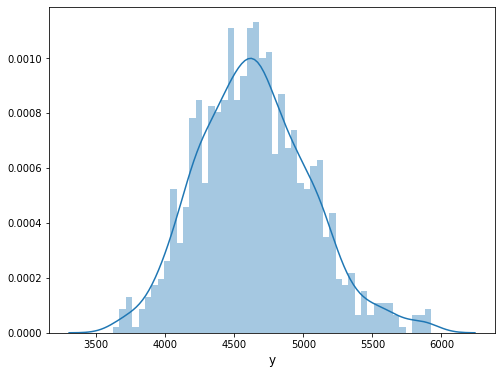

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

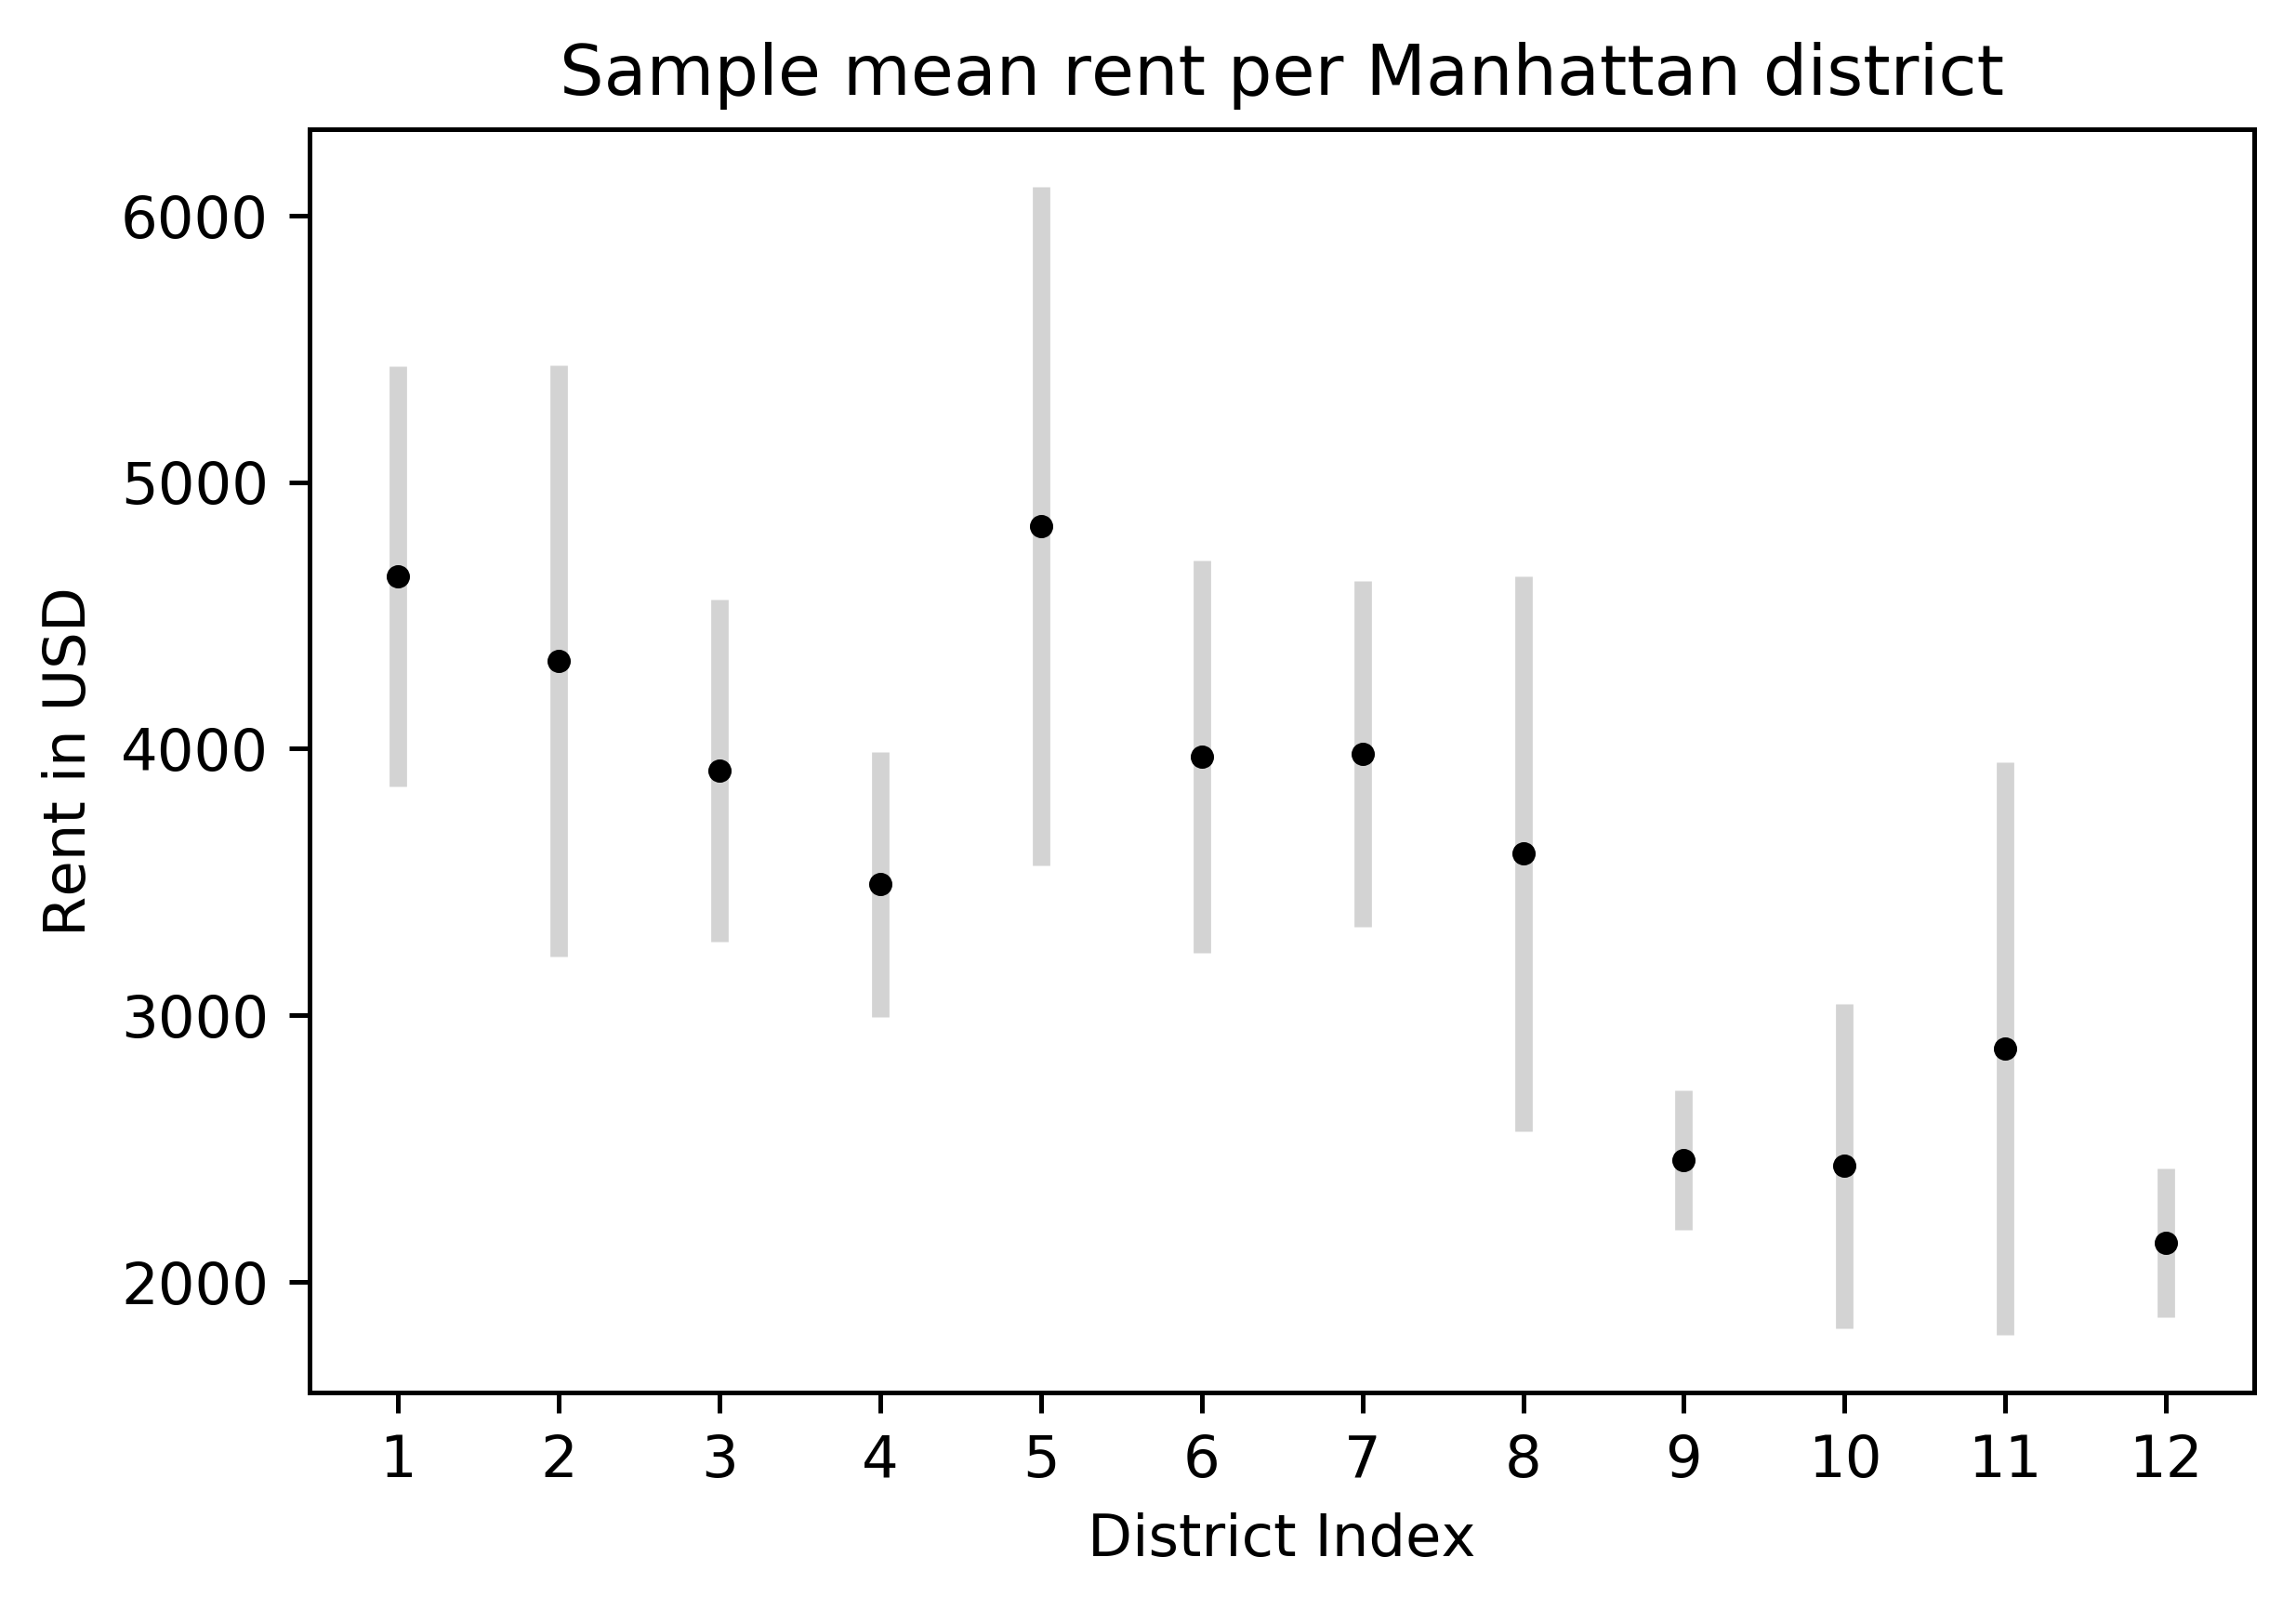

In [24]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Sample mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('District Index')
plt.xticks(range(1, bootstraps.shape[0] + 1))
plt.show()

In [25]:
def bootstrap(size = 10000):
    train_samples = train_df.groupby('boro_cd').apply(pd.DataFrame.sample, frac = 1, replace = True)
    train_samples = train_samples.astype({'price': 'int64'})
    features = []
    labels = []
    for i in range(train_samples['boro_cd'].min(), train_samples['boro_cd'].max() + 1):
        samples = []
        label = []
        get_boro = train_samples[train_samples['boro_cd'] == i]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(frac = 1, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

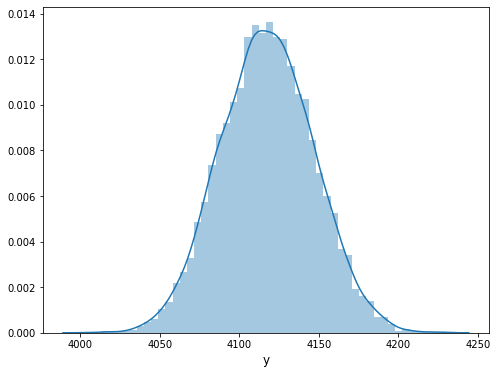

In [26]:
X, y = bootstrap()
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

In [27]:
np.std(y, axis = 1)

array([29.19165147, 34.3909031 , 23.98335852, 18.38717503, 39.12496377,
       18.74020269, 35.71208932, 26.60694384, 28.49259629, 34.05756706,
       54.35357841, 20.30161059])

In [28]:
print(mean)
print(np.mean(y, axis = 1))
print(mean - np.mean(y, axis = 1))

[4193.56724512 4255.001853   3791.24846536 3771.27443472 4383.77582714
 3914.07896296 4340.24426335 3756.22650942 2670.69181034 2734.9116129
 3191.36965377 2313.22557349]
[4117.51235129 4185.71882236 3702.84562987 3684.41817396 4241.03823234
 3822.98648941 4188.9545211  3665.25193201 2584.07131983 2584.59542839
 3073.52835591 2172.3267723 ]
[ 76.05489383  69.28303064  88.40283549  86.85626076 142.7375948
  91.09247356 151.28974225  90.97457741  86.62049052 150.31618452
 117.84129786 140.89880119]


In [29]:
low = np.mean(y, axis = 1) - 1.96 * np.std(y, axis = 1)
high = np.mean(y, axis = 1) + 1.96 * np.std(y, axis = 1)

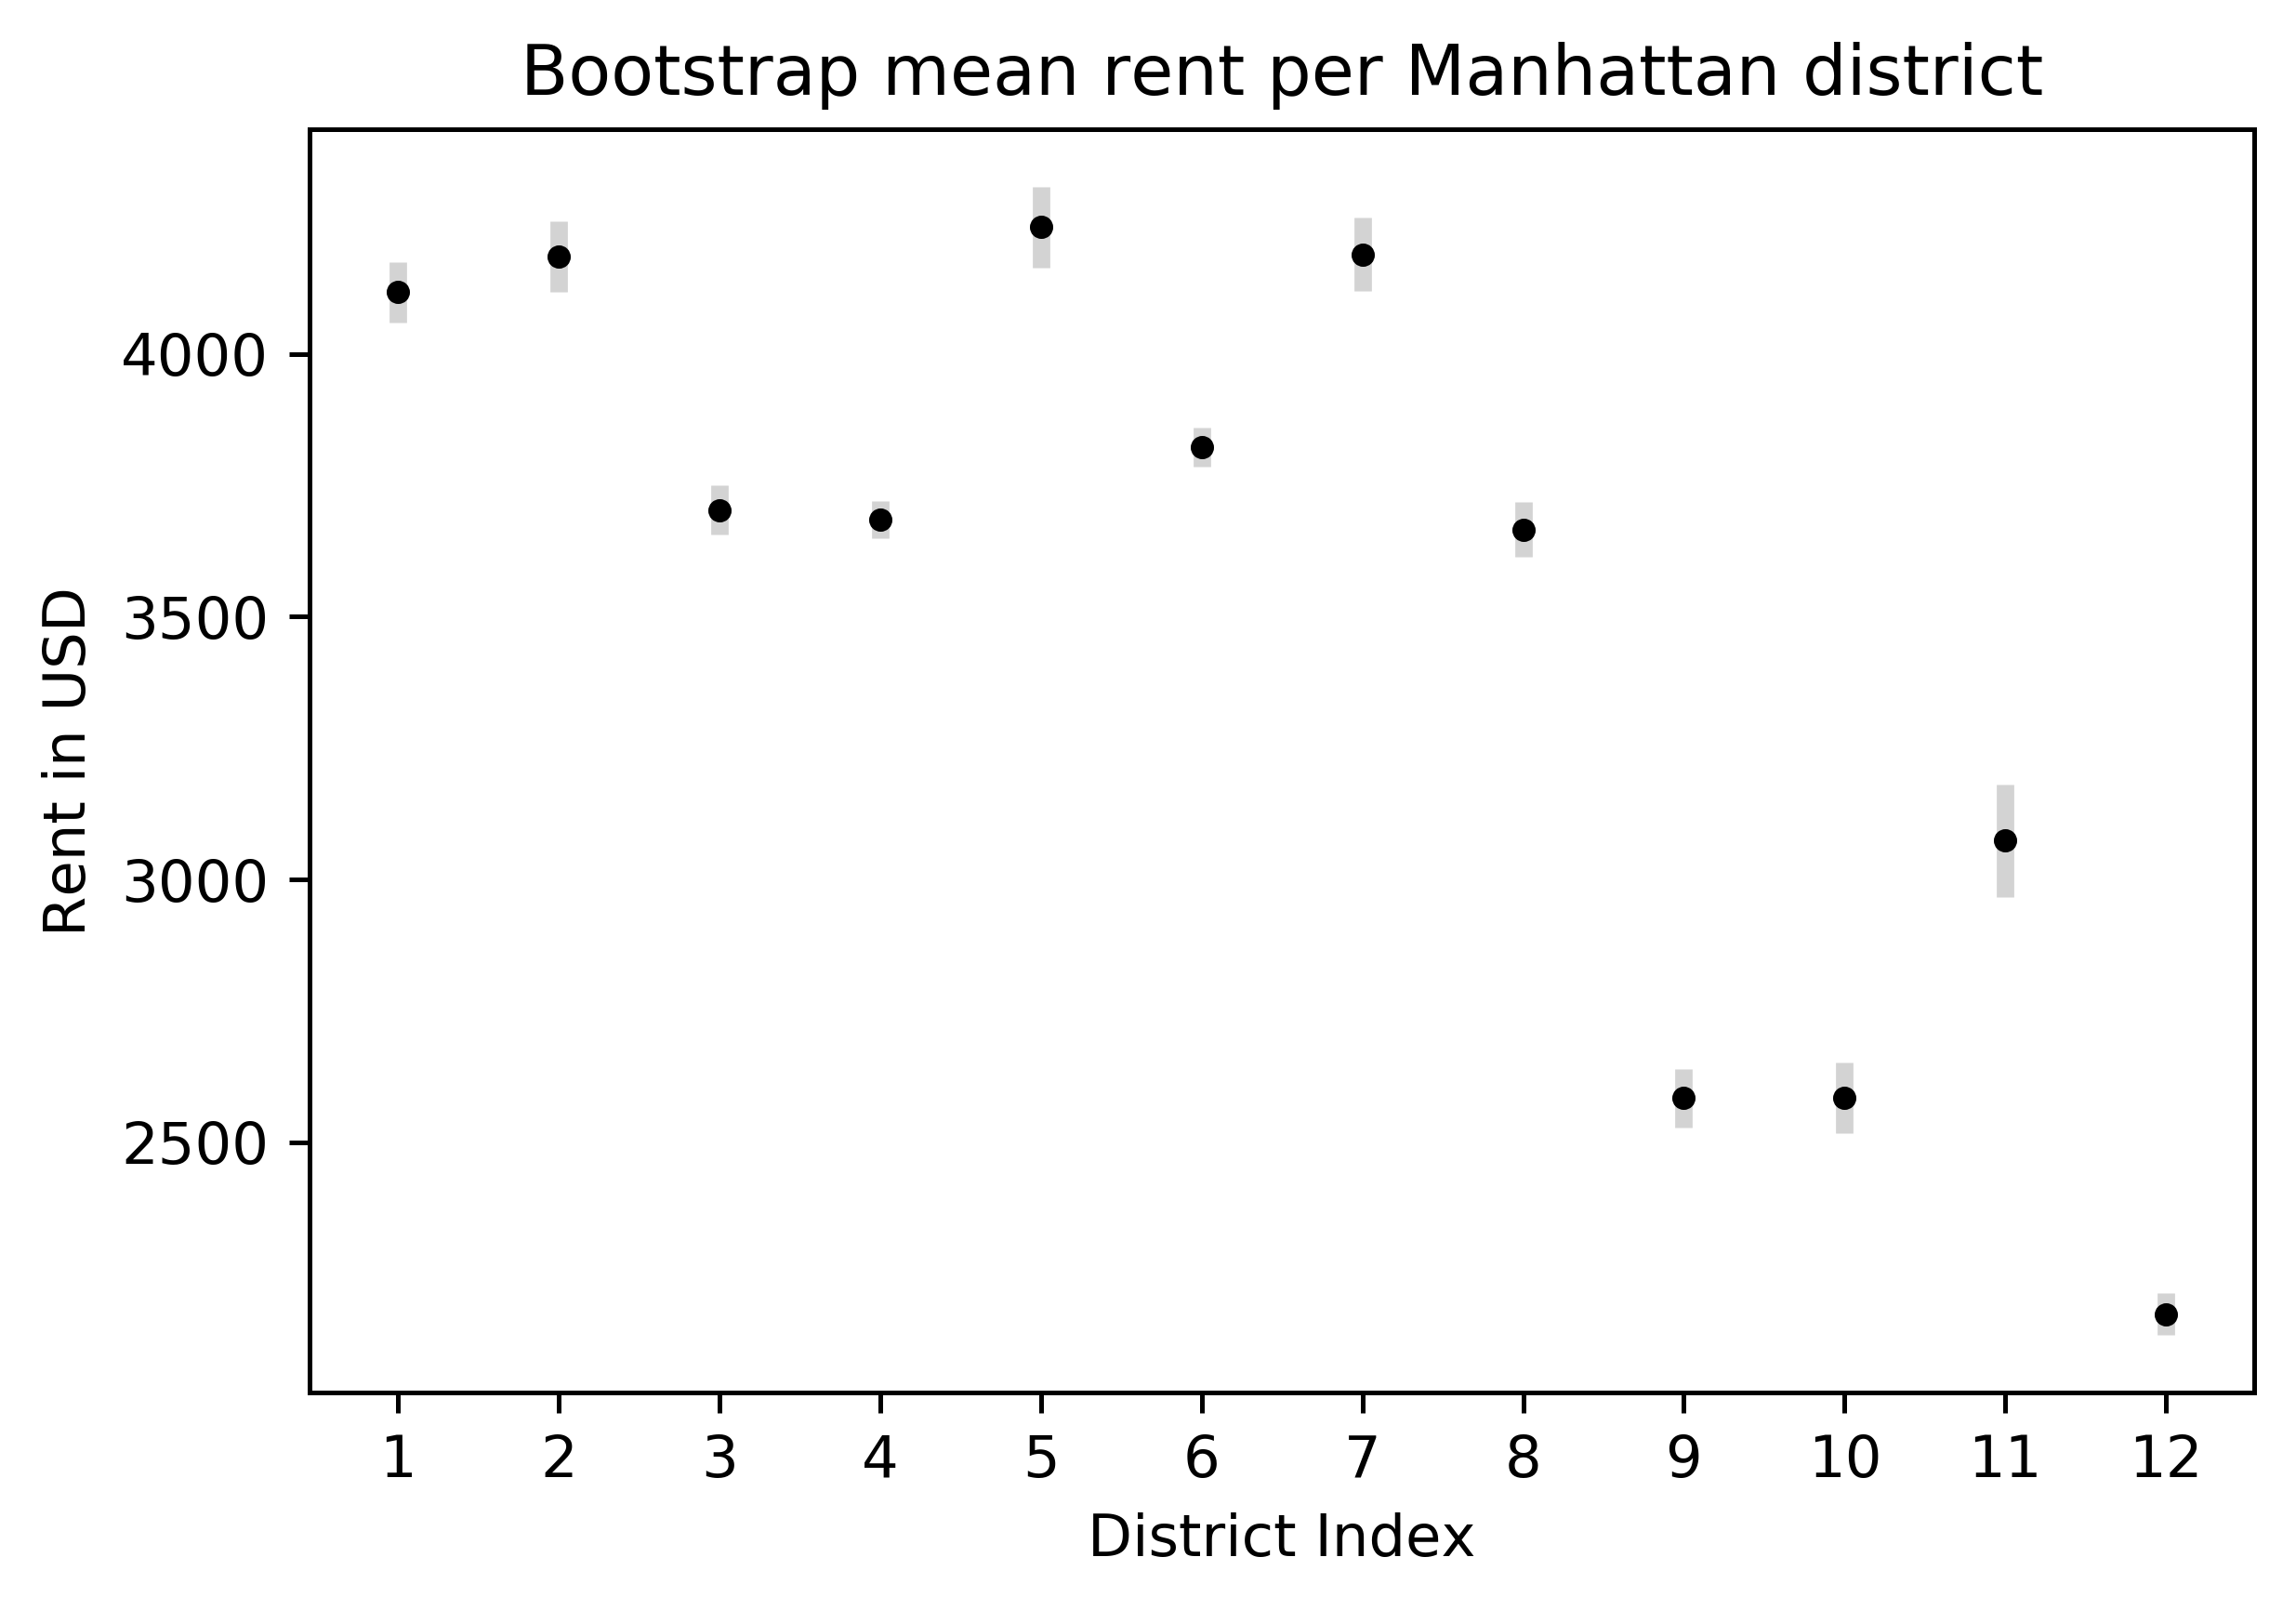

In [30]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrap mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('District Index')
plt.xticks(range(1, bootstraps.shape[0] + 1))
plt.show()

In [235]:
import torch
print('Torch version:', torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import scipy.sparse as sp

# import dgl
# from dgl.nn.pytorch import GraphConv
# import networkx as nx

Torch version: 1.5.1


In [237]:
features = np.mean(y, axis = 1)
features = np.reshape(features,(features.shape[0], -1))
features = np.array(features, dtype='float')
# labels = mean
labels = np.array(mean, dtype = 'float')

idx_train = list(np.array([1, 6, 7, 12]) - 1)
idx_val = list(np.array([3, 5, 8, 10])  - 1)
idx_test = list(np.array([2, 4, 9, 11])  - 1)


# train_labels = [mean[i] for i in index_train]
# val_labels = [mean[i] for i in index_val]
# test_labels = [mean[i] for i in index_test]

adj = np.loadtxt('adj.txt', dtype='float', delimiter=',')
# test = adj
# D = np.diag(np.power(np.sum(adj, axis = 1), -1))
# adj = np.dot(adj, D)

# adj = csr_matrix(adj)

# G = dgl.DGLGraph()
# adj_nx = nx.from_numpy_matrix(adj)
# G = dgl.from_networkx(adj_nx)

# print(features.shape)
# # print(features.T)

def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

adj = normalize(adj)

In [239]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'


class GCN(nn.Module):
#     def __init__(self, nfeat, nhid, nclass, dropout):
    def __init__(self, nfeat, nclass, dropout):
        super(GCN, self).__init__()

#         self.gc1 = GraphConvolution(nfeat, nhid)
#         self.gc2 = GraphConvolution(nhid, nclass)
        self.gc1 = GraphConvolution(nfeat, nclass)

        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
#         x = F.dropout(x, self.dropout, training=self.training)
#         x = self.gc2(x, adj)
        return x
    
# def accuracy(output, labels):
#     preds = output.max(1)[1].type_as(labels)
#     correct = preds.eq(labels).double()
#     correct = correct.sum()
#     return correct / len(labels)

In [240]:
EPOCHS = 5000

# Model and optimizer
# model = GCN(nfeat=features.shape[1],nhid=1,nclass=1,dropout=0.2)
model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.001)
mse = nn.MSELoss()

features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    if(epoch % 500 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0001 loss_train: 14026902.0000 loss_val: 13533132.0000 time: 0.0040s
Epoch: 0501 loss_train: 5381466.5000 loss_val: 4488897.0000 time: 0.0000s
Epoch: 1001 loss_train: 2079379.0000 loss_val: 1252748.7500 time: 0.0000s
Epoch: 1501 loss_train: 1220998.6250 loss_val: 565804.5625 time: 0.0000s
Epoch: 2001 loss_train: 1093922.1250 loss_val: 544049.8125 time: 0.0010s
Epoch: 2501 loss_train: 1085058.6250 loss_val: 569443.1250 time: 0.0010s
Epoch: 3001 loss_train: 1084804.7500 loss_val: 575396.8125 time: 0.0000s
Epoch: 3501 loss_train: 1084780.8750 loss_val: 575968.5000 time: 0.0000s
Epoch: 4001 loss_train: 1084752.7500 loss_val: 575974.6250 time: 0.0000s
Epoch: 4501 loss_train: 1084717.2500 loss_val: 575954.1875 time: 0.0010s
Optimization Finished!
Total time elapsed: 3.0146s
Test set results: loss= 713735.1875


In [241]:
output = model(features, adj)

In [242]:
output

tensor([[4216.3149],
        [4199.7646],
        [4228.9438],
        [4293.1816],
        [4091.7432],
        [4064.7061],
        [3435.5906],
        [3899.0576],
        [3037.5796],
        [3077.8081],
        [3274.7979],
        [2579.0635]], grad_fn=<ReluBackward0>)

In [243]:
print(labels)

tensor([4193.5674, 4255.0020, 3791.2485, 3771.2744, 4383.7759, 3914.0789,
        4340.2441, 3756.2266, 2670.6919, 2734.9116, 3191.3696, 2313.2256])


In [244]:
print(features)

tensor([[4117.5122],
        [4185.7188],
        [3702.8457],
        [3684.4182],
        [4241.0381],
        [3822.9866],
        [4188.9546],
        [3665.2520],
        [2584.0713],
        [2584.5955],
        [3073.5283],
        [2172.3267]])
